# Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Filter Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Loading the  Diabetes Dataset

In [4]:
df = pd.read_csv("diabetes.csv")

# Print the first five rows of the dataframe

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


# Print the last five rows of the dataframe

In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


# Print the number of rows and columns in the dataframe

In [7]:
df.shape

(768, 9)

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
print(df["Outcome"].value_counts())
print(100*df["Outcome"].value_counts()/len(df))

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0   65.104
1   34.896
Name: count, dtype: float64


In [11]:
print(df.describe().T)

                           count    mean     std    min    25%     50%     75%     max
Pregnancies              768.000   3.845   3.370  0.000  1.000   3.000   6.000  17.000
Glucose                  768.000 120.895  31.973  0.000 99.000 117.000 140.250 199.000
BloodPressure            768.000  69.105  19.356  0.000 62.000  72.000  80.000 122.000
SkinThickness            768.000  20.536  15.952  0.000  0.000  23.000  32.000  99.000
Insulin                  768.000  79.799 115.244  0.000  0.000  30.500 127.250 846.000
BMI                      768.000  31.993   7.884  0.000 27.300  32.000  36.600  67.100
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.244   0.372   0.626   2.420
Age                      768.000  33.241  11.760 21.000 24.000  29.000  41.000  81.000
Outcome                  768.000   0.349   0.477  0.000  0.000   0.000   1.000   1.000


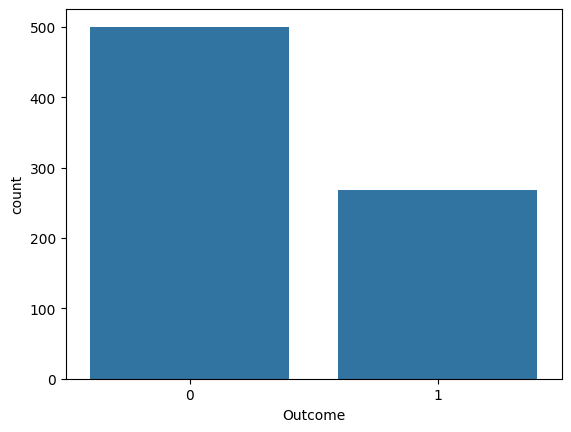

In [12]:
sns.countplot(x="Outcome",data=df)
plt.show()


In [13]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

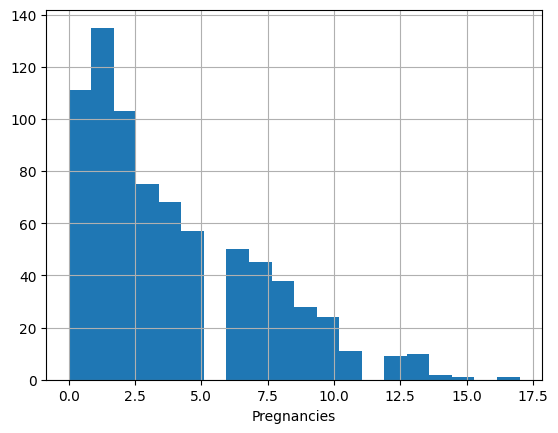

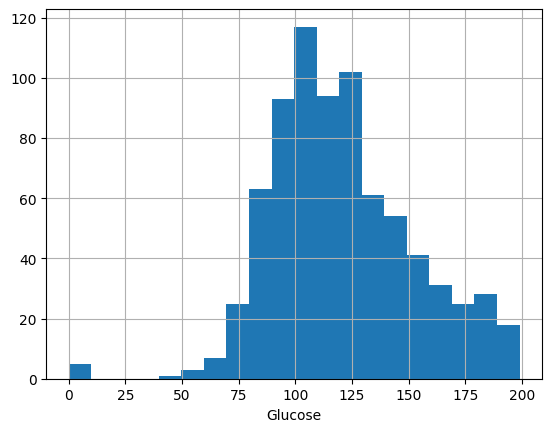

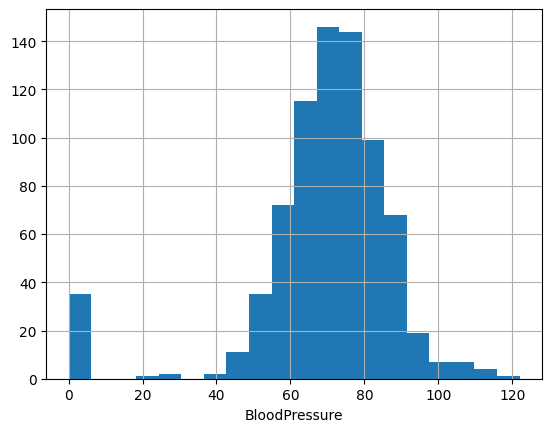

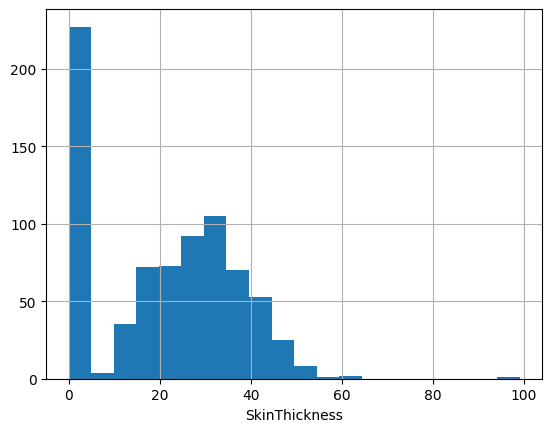

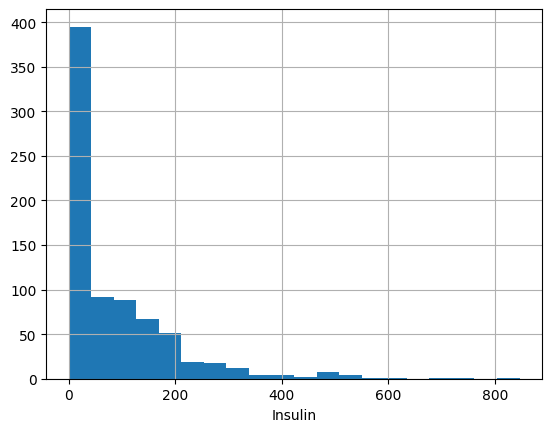

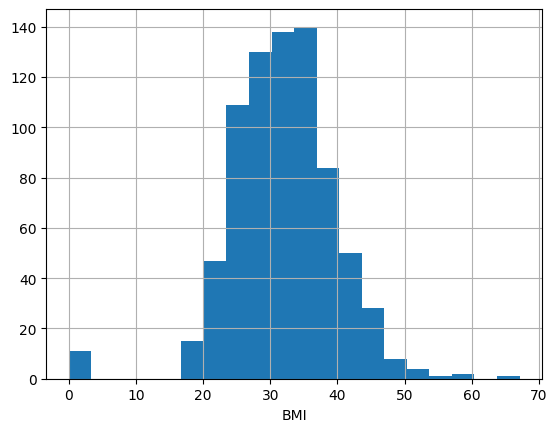

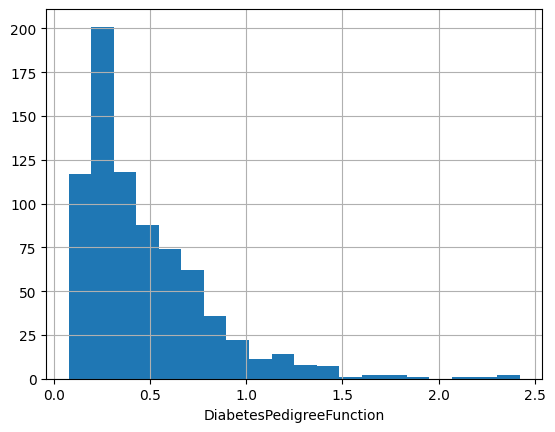

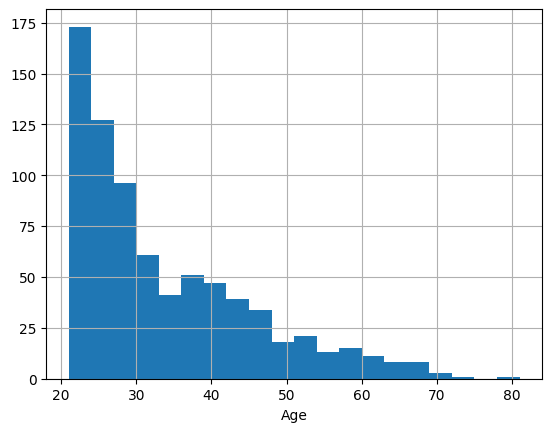

In [14]:
cols = [col for col in df.columns if "Outcome" not in col]

for col in cols:
    plot_numerical_col(df, col)

# Data Preprocessing Section

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
def oulier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
     quartile1 = dataframe[col_name].quantile(q1)
     quartile3 = dataframe[col_name].quantile(q3)
     interquartile_range =  q3-q1
     up_limit= quartile3+1.5*interquartile_range
     low_limit=quartile1-1.5*interquartile_range
     return low_limit,up_limit

In [17]:
def check_outlier(dataframe,col_name):
    low_limit,up_limit=oulier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [18]:
for col in cols:
    print(col,check_outlier(df,col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction False
Age True


In [19]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):

    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [20]:
def check_outlier(dataframe, col_name):

    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [21]:
for col in cols:
    # Look for every column
    print(col, check_outlier(df, col))


Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [22]:
for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

# Data preparation

In [24]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235,1
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118,0
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176,1
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471,0
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235,1
5,0.400,-0.024,0.111,-0.719,-0.240,-0.688,-0.448,0.059,0
6,0.000,-0.945,-1.222,0.281,0.452,-0.108,-0.325,-0.176,1
7,1.400,-0.048,-4.000,-0.719,-0.240,0.355,-0.624,0.000,0
8,-0.200,1.939,-0.111,0.688,4.028,-0.161,-0.561,1.412,1
9,1.000,0.194,1.333,-0.719,-0.240,-3.441,-0.367,1.471,1


# Model Selection and Prediction Section

In [25]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Hyperparameter Optimization Section

In [28]:
def ml_algorithms():
    models=[
                ("CART", DecisionTreeClassifier(random_state=42)),
                ("CatBoost", CatBoostClassifier(random_state=42, verbose=False)),
                ("GBM",GradientBoostingClassifier(random_state=42)),
                ("LightGBM", LGBMClassifier(random_state=42, verbose=-1)),
                ("Random Forest", RandomForestClassifier(random_state=42)),
                ("XGBoost", XGBClassifier(random_state=42, use_label_encoder=False)),
                ("KNeighborsClassifier",KNeighborsClassifier()),
                ("SVC",SVC()),
                ("LogisticRegression",LogisticRegression())
]
    return models
    
def hyper_param():
    d_values={}

    d_values["CART"]={
      "criterion":["gini", "entropy","log_loss"],
      "splitter":["best","random"]
  }
    d_values["CatBoost"]={
     "iterations": [100, 200],
     "learning_rate": [0.01, 0.1],
     "depth": [2, 3, 8]
}

    d_values["GBM"]={
      "loss":["log_loss", "exponential"],
      "n_estimators":[50,100,150]
  }
    d_values["LightGBM"]={
      "boosting_type":["str", "gbdt"],
      "n_estimators":[50,100,150]
  }
    d_values["Random Forest"]={
      "n_estimators":[40,60,80,100],
      "criterion":["gini", "entropy","log_loss"]

  }
    d_values["XGBoost"]={
    "booster":["gbtree","dart"],
        "dart_normalized_type":["tree","forest"]

  }
    d_values["KNeighborsClassifier"]={
      "n_neighbors":[5,6,7,8],
      "algorithm":["auto","ball_tree","kd_tree","brute’"],

}
    d_values["SVC"]={
      "kernel":["rbf","linear"],
      "C":[10,20,30,40]
  }
    d_values["LogisticRegression"]={
      'penalty':['l1', 'l2', 'elasticnet', None],
      'solver':["lbfgs","liblinear","newton-cg", "newton-cholesky","sag", "saga"]
  }



    return d_values

models=ml_algorithms()
param_grids=hyper_param()

In [29]:
scoring_metrics = ["accuracy", "precision"]
for model_name, model in models:
    cv_results = {}
    for metric in scoring_metrics:
        cv_results[metric] = cross_validate(model, X, y, cv=10, scoring={metric: metric}, error_score='raise')
        mean_score = cv_results[metric]['test_' + metric].mean()
        print()
        print(f"{model_name} {metric.capitalize()} score: {mean_score}")


CART Accuracy score: 0.7018284347231716

CART Precision score: 0.5765596458139561

CatBoost Accuracy score: 0.76825017088175

CatBoost Precision score: 0.7014398976982096

GBM Accuracy score: 0.7604066985645933

GBM Precision score: 0.6870570429071179

LightGBM Accuracy score: 0.7487354750512646

LightGBM Precision score: 0.6582283421162878

Random Forest Accuracy score: 0.7577751196172249

Random Forest Precision score: 0.6920056644610024

XGBoost Accuracy score: 0.7434723171565276

XGBoost Precision score: 0.6385130380486786

KNeighborsClassifier Accuracy score: 0.7421907040328093

KNeighborsClassifier Precision score: 0.6614805597452658

SVC Accuracy score: 0.7617053998632947

SVC Precision score: 0.7189456596035544

LogisticRegression Accuracy score: 0.7721804511278195

LogisticRegression Precision score: 0.7314932728090622


In [30]:
import warnings
warnings.filterwarnings('ignore')
results=[]

for name,model in models:
  clf=GridSearchCV(
      estimator=model,
      param_grid=param_grids[name],
      cv=10,
      return_train_score=False
  )

  clf.fit(X,y)
  cv_result=pd.DataFrame(clf.cv_results_)
  cv_result["model"]=name
  results.append(cv_result)
  print()
  print("Name of the algorithm=",name)
  print("Best Score of the model is   ",clf.best_score_)
  print("Best paraments for Best score is   ",clf.best_params_)
  print()

 





Name of the algorithm= CART
Best Score of the model is    0.7018284347231716
Best paraments for Best score is    {'criterion': 'gini', 'splitter': 'best'}


Name of the algorithm= CatBoost
Best Score of the model is    0.7656185919343814
Best paraments for Best score is    {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}


Name of the algorithm= GBM
Best Score of the model is    0.7630041011619959
Best paraments for Best score is    {'loss': 'log_loss', 'n_estimators': 50}


Name of the algorithm= LightGBM
Best Score of the model is    0.7487354750512646
Best paraments for Best score is    {'boosting_type': 'gbdt', 'n_estimators': 100}


Name of the algorithm= Random Forest
Best Score of the model is    0.7682159945317839
Best paraments for Best score is    {'criterion': 'gini', 'n_estimators': 80}


Name of the algorithm= XGBoost
Best Score of the model is    0.7434723171565276
Best paraments for Best score is    {'booster': 'gbtree', 'dart_normalized_type': 'tree'}


Name of th

In [31]:
 d={
      'penalty':['l1', 'l2', 'elasticnet', None],
      'solver':["lbfgs","liblinear","newton-cg", "newton-cholesky","sag", "saga"]
  }

logistic_reg=LogisticRegression()
logistic_best_grid=GridSearchCV(logistic_reg, d, cv=3, n_jobs=-1, verbose=True).fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [32]:
logistic_final = logistic_reg.set_params(**logistic_best_grid.best_params_, random_state=42).fit(X, y)

cv_results = cross_validate(logistic_final, X, y, cv=10, scoring=["accuracy"])
print("accuracy score: ", cv_results["test_accuracy"].mean())

accuracy score:  0.7734791524265209


# Model Rating Section

In [33]:
cv_results = cross_validate(logistic_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

f1 score:  0.6327426108827118
precision score:  0.7338174544753492
recall score:  0.5596866096866095
accuracy score:  0.7734791524265209
roc_auc score:  0.8303817663817664


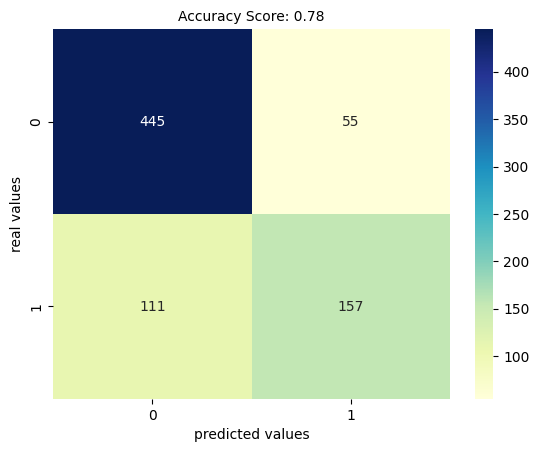

In [34]:
y_predict = logistic_final.predict(X)
def plot_confucion_matrix(y, y_predict):
    acc = round(accuracy_score(y,y_predict), 2)
    cm = confusion_matrix(y, y_predict)
    sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'YlGnBu')
    plt.xlabel('predicted values')
    plt.ylabel('real values')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()
plot_confucion_matrix(y, y_predict)

In [35]:
mse = mean_squared_error(y, y_predict)
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error : ", rmse)

Mean Squared Error:  0.21614583333333334
Mean Absolute Error:  0.21614583333333334
Root Mean Squared Error :  0.46491486675877913
